In [7]:
import tensorflow as tf

In [6]:
# Import `tensorflow`
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul_4:0", shape=(4,), dtype=int32)


In [7]:
# Import `tensorflow` 
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,4,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.add(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 6  8 11 12]


In [1]:
# Import `tensorflow` 
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,4,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 28 32]


In [12]:
print(tf.__version__)

1.5.0


In [14]:
1+5

6

Epoch: 0050 cost= 0.138172209 W= 0.38796023 b= -0.19393331
Epoch: 0100 cost= 0.131099537 W= 0.37973082 b= -0.13473192
Epoch: 0150 cost= 0.124843866 W= 0.37199107 b= -0.07905186
Epoch: 0200 cost= 0.119310811 W= 0.36471146 b= -0.026683288
Epoch: 0250 cost= 0.114416949 W= 0.3578649 b= 0.022570703
Epoch: 0300 cost= 0.110088505 W= 0.35142544 b= 0.068895355
Epoch: 0350 cost= 0.106260084 W= 0.34536898 b= 0.11246495
Epoch: 0400 cost= 0.102874041 W= 0.3396728 b= 0.15344317
Epoch: 0450 cost= 0.099879295 W= 0.3343153 b= 0.19198419
Epoch: 0500 cost= 0.097230606 W= 0.32927662 b= 0.22823289
Epoch: 0550 cost= 0.094888031 W= 0.3245375 b= 0.2623256
Epoch: 0600 cost= 0.092816204 W= 0.3200801 b= 0.29439119
Epoch: 0650 cost= 0.090983875 W= 0.31588802 b= 0.3245493
Epoch: 0700 cost= 0.089363381 W= 0.31194523 b= 0.35291353
Epoch: 0750 cost= 0.087930195 W= 0.3082367 b= 0.3795917
Epoch: 0800 cost= 0.086662725 W= 0.30474886 b= 0.40468314
Epoch: 0850 cost= 0.085541889 W= 0.30146855 b= 0.42828122
Epoch: 0900 cost

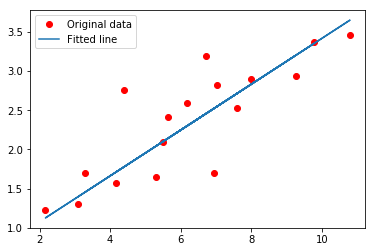

Testing... (Mean square loss Comparison)
Testing cost= 0.07712853
Absolute mean square loss difference: 0.0057703555


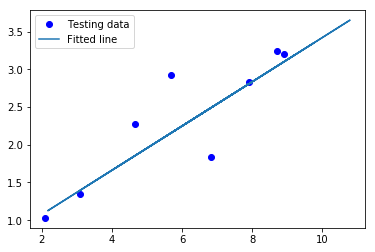

In [20]:
#RANDOM PROJECT- Just try to understand this

'''
A linear regression learning algorithm example using TensorFlow library.

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [27]:
# Multiplying two numbers in tensorflow


# Importing the module
import tensorflow as tf
 
# Declare the constants
a = tf.constant(5.0)
b = tf.constant(6.0)

#Multiplying it
c = a * b

# Create the session object as sess.
sess = tf.Session()

#Running multiplication actually
output = sess.run(c)

# Printing value
print(output)

# Closing session
sess.close()

30.0


In [37]:
# Two types of Addition
#Adding with tensor

sess=tf.Session()
c=tf.add(a,b)           # Point of difference
print("With tensor method- ",sess.run(c))

#Adding without tensor

#sess=tf.Session()
c = a+b                 # Point of difference
print("Without tensor method- ",sess.run(c))

# Closing Session
sess.close()

With tensor method-  11.0
Without tensor method-  11.0


In [2]:
'''
A nearest neighbor learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import numpy as np
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)



Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `argmin` instead
Test 0 Prediction: 2 True Class: 2
Test 1 Prediction: 2 True Class: 2
Test 2 Prediction: 5 True Class: 3
Test 3 Prediction: 9 True Class: 9
Test 4 Prediction: 1 True Class: 1
Test 5 Prediction: 0 True Class: 0
Test 6 Prediction: 6 True Class: 6
Test 7 Prediction: 9 True Class: 4
Test 8 Prediction: 0 True Class: 0
Test 9 Prediction: 2 True Class: 2
Test 10 Prediction: 1 True Class: 1
Test 11 Prediction: 2 True Class: 2
Test 12 Prediction: 3 True Class: 3
Test 13 Prediction: 8 True Class: 8
Test 14 Prediction: 2 True Class: 2
Test 15 Prediction: 3 True Class: 3
Test 16 Prediction: 7 True Class: 7
Test 17 Prediction: 5 True Class: 5
Test 18 Prediction: 1 True Class: 1
Test 19 Prediction: 6 True Class: 6
Test 20 Prediction: 2 True Class: 2
Test 21 Predicti